<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/Doctr_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-doctr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1

In [ ]:
!pip install tf2onnx        #1.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 29.7 MB/s eta 0:00:00


In [ ]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94122142 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [ ]:
from doctr.io import DocumentFile

In [ ]:
multi_img_doc = DocumentFile.from_images(["/content/drive/MyDrive/OCR_Cardbord_images/1708520917612554.jpg", "/content/drive/MyDrive/OCR_Cardbord_images/1708520932181342.jpg"])

In [ ]:
result = model(multi_img_doc)

In [ ]:
!pip install mplcursors

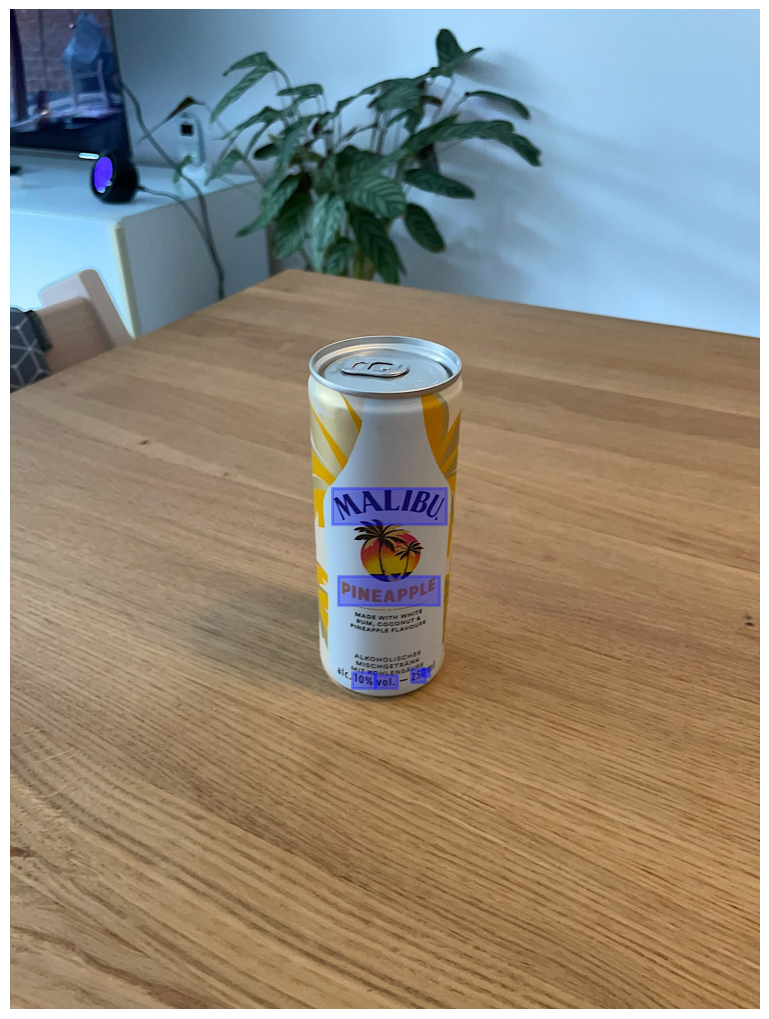

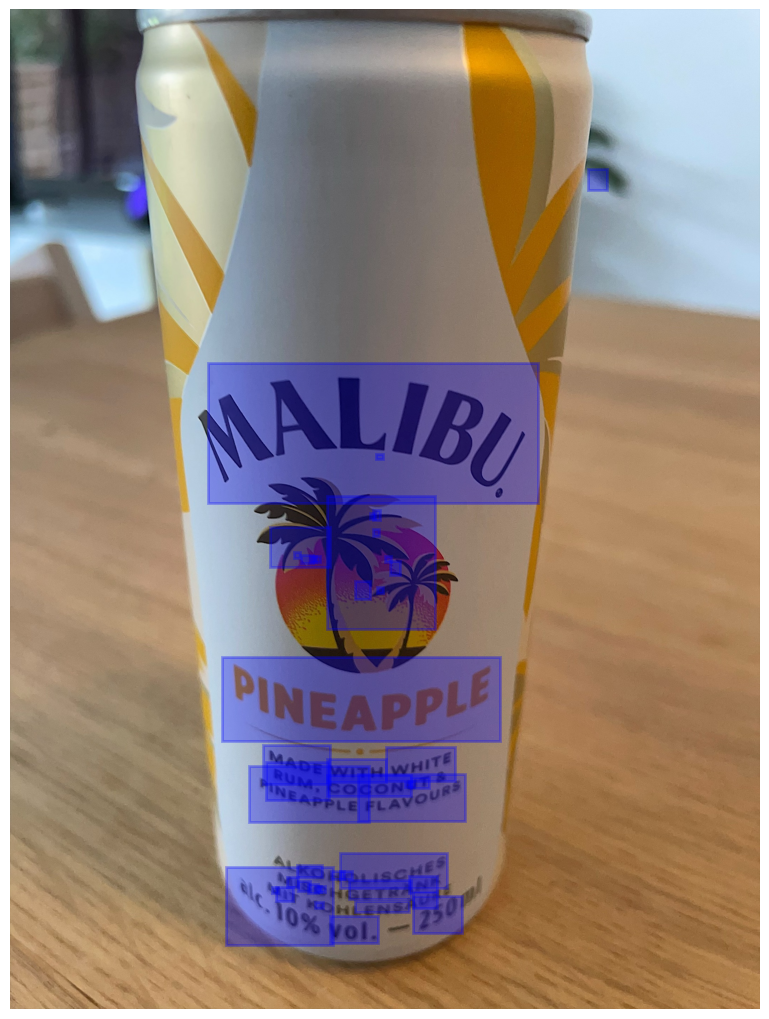

In [ ]:
result.show()

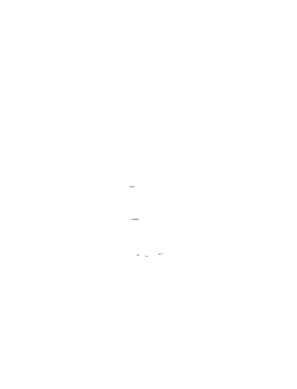

In [ ]:
import matplotlib.pyplot as plt

synthetic_pages = result.synthesize(font_size=40)
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [ ]:
i=0
words={}
for page in result.pages:
    i=i+1
    words[i] = []
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                print(word.value)
                words[i].append(word.value)

MALIBU
PINEAPPLE
10%
vol.
250
0
-
-
-
-
-
-
-
-
a
E
MALIBU
-
-
-
-
1A
PINEAPPLE
WHITE
WITH
RUM.
COCON
-
U
JT
NUACOS
CONVOURS
MADE
Ko
-
a
a
OLISCHES
e
1
S
€

-
GETRA
NI

LENSA
u
vol.
Vtor
250


In [ ]:
words[1]

['MALIBU', 'PINEAPPLE', '10%', 'vol.', '250', '0']

In [ ]:
words[2]

['-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'a',
 'E',
 'MALIBU',
 '-',
 '-',
 '-',
 '-',
 '1A',
 'PINEAPPLE',
 'WHITE',
 'WITH',
 'RUM.',
 'COCON',
 '-',
 'U',
 'JT',
 'NUACOS',
 'CONVOURS',
 'MADE',
 'Ko',
 '-',
 'a',
 'a',
 'OLISCHES',
 'e',
 '1',
 'S',
 '€',
 '',
 '-',
 'GETRA',
 'NI',
 '',
 'LENSA',
 'u',
 'vol.',
 'Vtor',
 '250']

In [ ]:
import cv2
import matplotlib.pyplot as plt

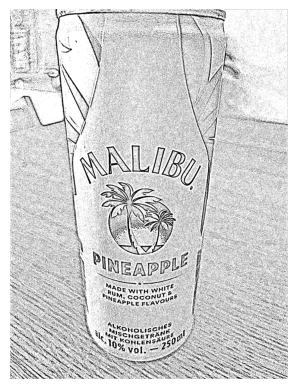

True

In [ ]:
image_path = '/content/drive/MyDrive/OCR_Cardbord_images/1708520932181342.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Apply adaptive thresholding
thresholded_image = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 29, 3
)

# Convert thresholded image back to BGR for OCR model
thresholded_image_rgb = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2RGB)

# Optional: Visualize the thresholded image
plt.imshow(thresholded_image_rgb)
plt.axis('off')
plt.show()

thresholded_image_path = 'thresholded_image.jpg'
cv2.imwrite(thresholded_image_path, thresholded_image)



# Perform OCR


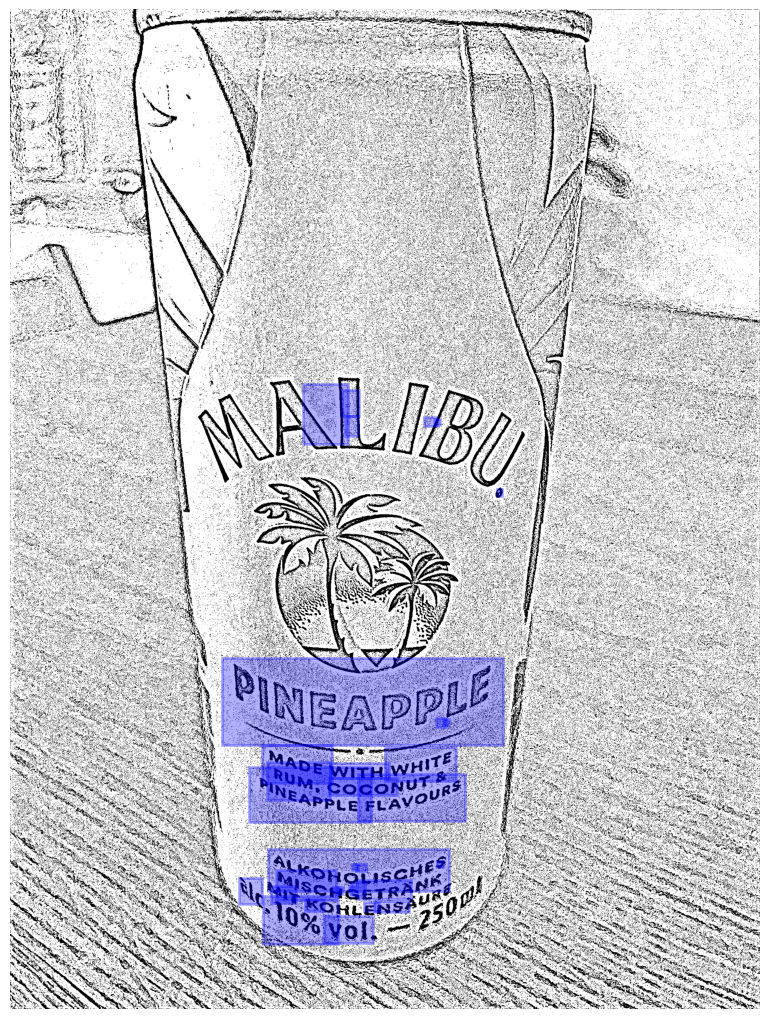

In [ ]:
single_img_doc = DocumentFile.from_images(thresholded_image_path)
result = model(single_img_doc)
result.show()